Introduction
The datasets that data professionals use to solve problems typically contain missing values, which must be dealt with in order to achieve clean, useful data. This is particularly crucial in exploratory data analysis (EDA). In this activity, you will learn how to address missing data.

You are a financial data consultant, and an investor has tasked your team with identifying new business opportunities. To help them decide which future companies to invest in, you will provide a list of current businesses valued at more than $1 billion. These are sometimes referred to as "unicorns." Your client will use this information to learn about profitable businesses in general.

The investor has asked you to provide them with the following data:

Companies in the hardware industry based in either Beijing, San Francisco, or London
Companies in the artificial intelligence industry based in London
A list of the top 20 countries sorted by sum of company valuations in each country, excluding United States, China, India, and United Kingdom
A global valuation map of all countries with companies that joined the list after 2020
A global valuation map of all countries except United States, China, India, and United Kingdom (a separate map for Europe is also required)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px

In [3]:
df_companies = pd.read_csv("./Raw_data/eda_datasets/Files/Unicorn_Companies.csv")

In [4]:
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [5]:
df_companies.describe().round(2)

,Year Founded
count,1074.0
mean,2012.9
std,5.7
min,1919.0
25%,2011.0
50%,2014.0
75%,2016.0
max,2021.0


In [6]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [7]:
df_companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [8]:
df_companies["Date Joined"] = pd.to_datetime(df_companies["Date Joined"])
df_companies["Year Joined"] = df_companies["Date Joined"].dt.year
df_companies.head()

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9712\2814076078.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_companies["Date Joined"] = pd.to_datetime(df_companies["Date Joined"])


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [9]:
def str_to_num(x):
    return int(x.strip(r"\$B"))

df_companies["valuation_num"] = df_companies["Valuation"].apply(str_to_num)
df_companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,180
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,100
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,100
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,95
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,46
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,40
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019,40
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014,39
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017,38
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019,38


In [10]:
# Find the number of missing values in each column in this dataset.

df_companies.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country/Region       0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
valuation_num        0
dtype: int64

In [11]:
mask = df_companies.isna()
mask

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,False,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
mask = mask.any(axis=1)
mask

0       False
1       False
2       False
3       False
4       False
        ...  
1069    False
1070    False
1071    False
1072    False
1073    False
Length: 1074, dtype: bool

In [13]:
df_missing_r = df_companies[mask]
df_missing_r

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN,2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


In [23]:
count_total = df_companies.size
count_total

df_companies_drop_na_r = df_companies.dropna().size #Drop rows with NaN
print(df_companies.shape,"\n",df_companies.dropna().shape)
df_companies_drop_na_r

df_companies_drop_na_c = df_companies.dropna(axis=1).size #Drop Columns with NaN
print(df_companies.shape,"\n",df_companies.dropna(axis=1).shape)
df_companies_drop_na_c

# Print the percentage of values removed by dropping rows.
print(f"{(100-((df_companies_drop_na_r/count_total)*100)):.3f}")

# Print the percentage of values removed by dropping columns.
print(f"{(100-((df_companies_drop_na_c/count_total)*100)):.3f}")

(1074, 12) 
 (1057, 12)
(1074, 12) 
 (1074, 10)
1.583
16.667


In [24]:
# 1. Fill missing values using the 'fillna()' method, back-filling
df_companies = df_companies.fillna(method="backfill")

# 2. Show the rows that previously had missing values
#df_companies[mask]

df_companies.iloc[df_missing_r.index ,:]

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_9712\2589767428.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_companies = df_companies.fillna(method="backfill")


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
12,FTX,$32B,2021-07-20,Fintech,Jacksonville,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,32
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,El Segundo,Singapore,Asia,2015,$263M,Kuang-Chi,2020,4
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,San Francisco,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway",2021,3
251,Trax,$3B,2019-07-22,Artificial intelligence,Amsterdam,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T...",2019,3
325,Amber Group,$3B,2021-06-21,Fintech,San Francisco,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021,3
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",San Francisco,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021,2
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,Helsinki,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund",2021,2
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,"Sequoia Capital India, The Times Group, GMO Ve...",2015,1
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,New York,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021,1
848,Matrixport,$1B,2021-06-01,Fintech,San Francisco,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS...",2021,1


***
# Results and evaluation
Now that you've addressed your missing values, provide your investor with their requested data points.

## Companies in the Hardware Industry
Your investor is interested in identifying unicorn companies in the Hardware industry in the following cities: Beijing, San Francisco, and London. They are also interested in companies in the Artificial intelligence industry in London.

Write a selection statement that extracts the rows that meet these criteria.

In [25]:
# 1. Create a Boolean mask using conditional logic
hardware_mask = (df_companies["Industry"] == "Hardware") & (df_companies["City"].isin(["Beijing","San Francisco","London"]))
ai_mask = (df_companies["Industry"] == "Artificial intelligence") & (df_companies["City"] == "London")

# 2. Apply the mask to the `df_companies` dataframe and assign the results to `df_invest`
df_companies_hrwr_ai = df_companies[hardware_mask | ai_mask]
df_companies_hrwr_ai

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,valuation_num
36,Bitmain,$12B,2018-07-06,Hardware,Beijing,China,Asia,2015,$765M,"Coatue Management, Sequoia Capital China, IDG ...",2018,12
43,Global Switch,$11B,2016-12-22,Hardware,London,United Kingdom,Europe,1998,$5B,"Aviation Industry Corporation of China, Essenc...",2016,11
147,Chipone,$5B,2021-12-16,Hardware,Beijing,China,Asia,2008,$1B,"China Grand Prosperity Investment, Silk Road H...",2021,5
845,Density,$1B,2021-11-10,Hardware,San Francisco,United States,North America,2014,$217M,"Founders Fund, Upfront Ventures, 01 Advisors",2021,1
873,BenevolentAI,$1B,2015-06-02,Artificial intelligence,London,United Kingdom,Europe,2013,$292M,Woodford Investment Management,2015,1
923,Geek+,$1B,2018-11-21,Hardware,Beijing,China,Asia,2015,$439M,"Volcanics Ventures, Vertex Ventures China, War...",2018,1
1040,TERMINUS Technology,$1B,2018-10-25,Hardware,Beijing,China,Asia,2015,$623M,"China Everbright Limited, IDG Capital, iFLYTEK",2018,1
1046,Tractable,$1B,2021-06-16,Artificial intelligence,London,United Kingdom,Europe,2014,$120M,"Insight Partners, Ignition Partners, Georgian ...",2021,1


## List of countries by sum of valuation
For each country, sum the valuations of all companies in that country, then sort the results in descending order by summed valuation. Assign the results to a variable called national_valuations.

In [26]:
# Group the data by`Country/Region`
valuation_by_country = df_companies.groupby(["Country/Region"])["valuation_num"].sum().sort_values(ascending = False).reset_index()
valuation_by_country.head(15)

,Country/Region,valuation_num
0,United States,1933
1,China,696
2,India,196
3,United Kingdom,195
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Sweden'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Israel'),
  Text(7, 0, 'Brazil'),
  Text(8, 0, 'Bahamas'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Netherlands'),
  Text(12, 0, 'Hong Kong'),
  Text(13, 0, 'Turkey'),
  Text(14, 0, 'Mexico'),
  Text(15, 0, 'Estonia'),
  Text(16, 0, 'Finland'),
  Text(17, 0, 'Ireland'),
  Text(18, 0, 'Belgium'),
  Text(19, 0, 'Japan'),
  Text(20, 0, 'Switzerland'),
  Text(21, 0, 'Austria'),
  Text(22, 0, 'Denmark'),
  Text(23, 0, 'Colombia'),
  Text(24, 0, 'Vietnam'),
  Text(25, 0, 'Lithuania'),
  Text(26, 0, 'Norway'),
  Text(27, 0, 'United Arab Emirates'),
  Text(28, 0, 'Spain'),
  Text(29, 0, 'South Africa')])

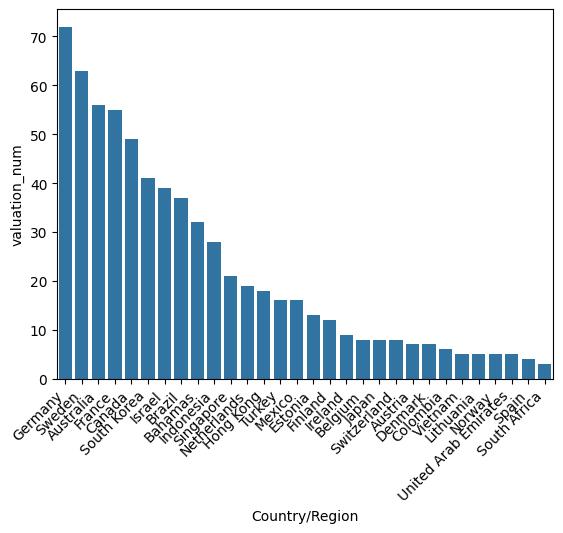

In [29]:
national_valuations_no_big4 = valuation_by_country.iloc[4:,:]

sns.barplot(
    data= national_valuations_no_big4.head(30),
    x= "Country/Region",
    y="valuation_num",
)

plt.xticks(rotation=45, horizontalalignment = "right")

In [30]:
#another way to pick the countries under the Big 4
valuation_country_notBig4 = ~valuation_by_country["Country/Region"].isin(["United States","China","India","United Kingdom"])
valuation_country_notBig4 = valuation_by_country[valuation_country_notBig4]
valuation_country_notBig4

,Country/Region,valuation_num
4,Germany,72
5,Sweden,63
6,Australia,56
7,France,55
8,Canada,49
9,South Korea,41
10,Israel,39
11,Brazil,37
12,Bahamas,32
13,Indonesia,28


<Axes: xlabel='valuation_num', ylabel='Country/Region'>

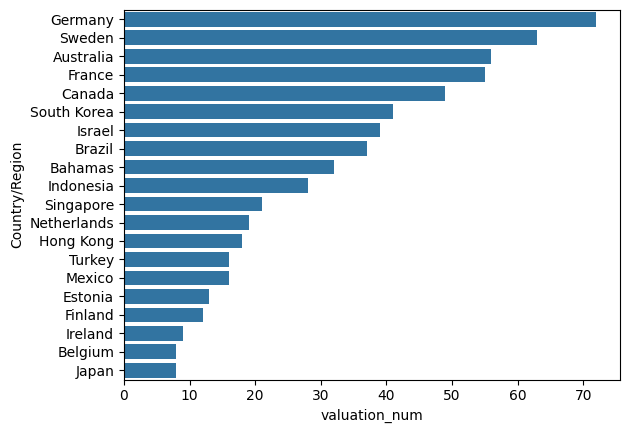

In [31]:
sns.barplot(
    data = valuation_country_notBig4.head(20),
    x= "valuation_num",
    y="Country/Region"
)

In [32]:
px.scatter_geo(
    valuation_country_notBig4,
    locations = "Country/Region",
    size="valuation_num",
    locationmode= "country names",
    color= "Country/Region"
)